# Decision Trees

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. For good introduction to DTs look [at](http://www.stats.ox.ac.uk/~flaxman/HT17_lecture13.pdf).

### Regression with Decision Trees

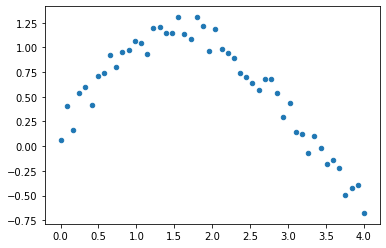

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0,4)
random_error = 0.35*np.random.rand(len(X))
y = np.add(np.sin(X), random_error)

plt.scatter(X, y, s=20)
plt.show()

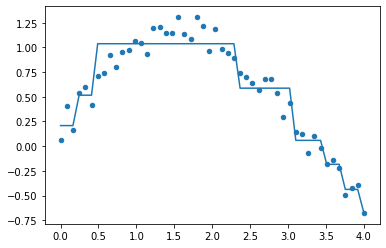

In [3]:
from sklearn.tree import DecisionTreeRegressor
regr_ = DecisionTreeRegressor(max_depth=3)

regr_.fit(X.reshape(-1, 1), y)

y_ = regr_.predict(X.reshape(-1, 1))
plt.scatter(X, y, s=20)
plt.plot(X, y_)


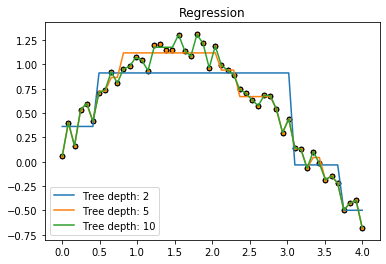

In [4]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

plt.title('Regression')
for i in [2,5,10]:
    regr_ = DecisionTreeRegressor(max_depth=i)


    regr_.fit(X.reshape(-1, 1), y)

    y_ = regr_.predict(X.reshape(-1, 1))
    plt.scatter(X, y, s=20, edgecolor="black", c="darkorange")#, label="data")
    plt.plot(X, y_, label="Tree depth: " + str(i))
    plt.legend()

###  Decision trees for continuous values classification

In [5]:
import numpy as np

from sklearn import datasets
data = datasets.load_wine()

Load dataset

In [6]:
print("sample object:\n", data.data[1,:])
print("target: ", data.target[1])

print("\nclasses in data: ", np.unique(data.target))

sample object:
 [1.32e+01 1.78e+00 2.14e+00 1.12e+01 1.00e+02 2.65e+00 2.76e+00 2.60e-01
 1.28e+00 4.38e+00 1.05e+00 3.40e+00 1.05e+03]
target:  0

classes in data:  [0 1 2]


dataset preparation (no standardisation is necessary for decision trees)

In [7]:
from sklearn.model_selection import train_test_split
training_data, testing_data, training_target, testing_target = \
train_test_split(data.data, data.target, test_size=0.4)


Fit a decision tree classifier using [DecisionTreeClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) class nad entropy as spliting a citeria

In [8]:
from sklearn.tree import DecisionTreeClassifier

my_tree = DecisionTreeClassifier(criterion='entropy', max_depth=10);
my_tree.fit(training_data, training_target)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Evaluate classifier on testing data

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print(accuracy_score(testing_target, my_tree.predict(testing_data)))
print(confusion_matrix(testing_target,my_tree.predict(testing_data)))

0.9027777777777778
[[23  2  0]
 [ 2 28  1]
 [ 1  1 14]]


#### Using multiple classifiers (one of ensemble methods)

In [10]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=50, max_features=6)
forest.fit(training_data, training_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
print(accuracy_score(testing_target, forest.predict(testing_data)))
print(confusion_matrix(testing_target,forest.predict(testing_data)))

0.9444444444444444
[[23  2  0]
 [ 1 29  1]
 [ 0  0 16]]


### Student task:

TODO: For "Olivetti faces" dataset build face classifier using decision tree and random forest classifier. Compare and evaluate classifiers.

In [12]:
from sklearn.datasets import fetch_olivetti_faces
dataset = fetch_olivetti_faces()
data = dataset.data
targets = dataset.target

In [13]:
print(dataset['DESCR'])

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

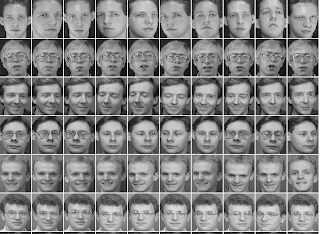

Text(0.5, 1.0, 'target: 0')

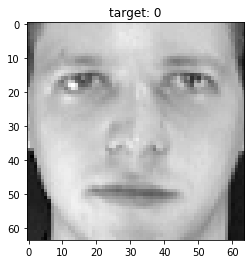

In [14]:
import matplotlib.pyplot as plt
plt.imshow(data[0,:].reshape(64,64), cmap=plt.cm.gray, interpolation="nearest")
plt.title("target: " + str(targets[0]))

Text(0.5, 1.0, 'target: 0')

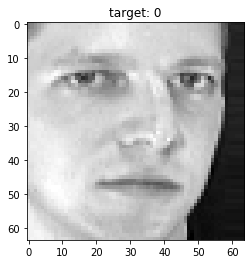

In [15]:
plt.imshow(data[1,:].reshape(64,64), cmap=plt.cm.gray, interpolation="nearest")
plt.title("target: " + str(targets[1]))

In [16]:
training_x_people, testing_x_people, training_y_people, testing_y_people = \
train_test_split(data, targets, test_size=0.4)

d_t=DecisionTreeClassifier(max_depth=10, criterion='entropy')
d_t.fit(training_x_people,training_y_people)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [17]:
r_f=RandomForestClassifier(n_estimators=100, max_features="log2")
r_f.fit(training_x_people, training_y_people)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
print(accuracy_score(testing_y_people, d_t.predict(testing_x_people)))
print(confusion_matrix(testing_y_people, d_t.predict(testing_x_people)))

print(accuracy_score(testing_y_people, r_f.predict(testing_x_people)))
print(confusion_matrix(testing_y_people, r_f.predict(testing_x_people)))


0.45
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 1]]
0.90625
[[4 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 5 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


### Face recreation using random forest (multiclass and multilabel classifier)

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
data = fetch_olivetti_faces()
targets = data.target

training_faces, testing_faces = train_test_split(data.data, test_size=0.1)

# split upper and lower part of a face
upper_part_training = training_faces[:, :2048] #4096/2
lower_part_training = training_faces[:, 2048:]

upper_part_testing = testing_faces[:, :2048]
lower_part_testing = testing_faces[:, 2048:]

In [20]:
from sklearn.ensemble import ExtraTreesRegressor
random_forest = ExtraTreesRegressor(n_estimators=100, max_features=200, random_state=0)

random_forest.fit(upper_part_training, lower_part_training)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features=200, max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
                    oob_score=False, random_state=0, verbose=0,
                    warm_start=False)

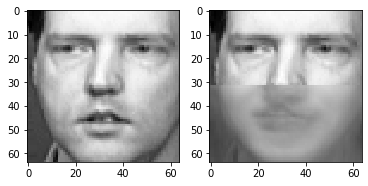

In [21]:

id=2
plt.subplot("121")
plt.imshow(testing_faces[id].reshape(64,64), cmap=plt.cm.gray, interpolation="nearest")
plt.subplot("122")

guessed_face = np.hstack((upper_part_testing[id].reshape(1, -1),
                          random_forest.predict(upper_part_testing[id].reshape(1, -1))))

plt.imshow(guessed_face.reshape(64,64), cmap=plt.cm.gray, interpolation="nearest")

[3186.994345750454, 3265.5778115258768, 6597.639639639639, 6360.8378378378375]
[0.5180952700191048, 0.5062126810506107, 0.02702702702702703, 0.009009009009009009]


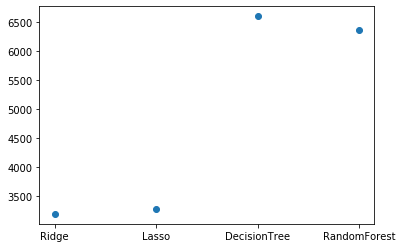

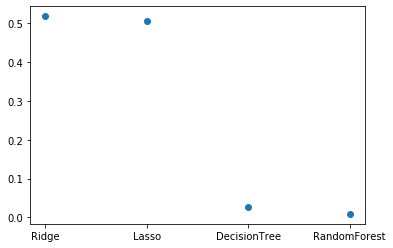

In [25]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge 
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

x,y=load_diabetes(return_X_y=True)

#-----------------------------

scaler = StandardScaler()
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=66) 

#-----------------------------

ridge = Ridge(alpha=0.9, solver="cholesky")
ridge.fit(x_train,y_train)
    
lasso = Lasso(max_iter=1e6)
lasso.fit(x_train,y_train)

d_t_diabetes=DecisionTreeClassifier(max_depth=10, criterion='entropy')
d_t_diabetes.fit(x_train,y_train)

r_f_diabetes = RandomForestClassifier(n_estimators=100)
r_f_diabetes.fit(x_train, y_train)

#======================================================================

mseridge =  (mean_squared_error(y_test, ridge.predict(x_test)))
mselasso = mean_squared_error(y_test, lasso.predict(x_test))
msedt = mean_squared_error(y_test, d_t_diabetes.predict(x_test))
mserm = mean_squared_error(y_test, r_f_diabetes.predict(x_test))


scoreRidge = ridge.score(x_test, y_test)
scoreLasso = lasso.score(x_test, y_test)
scoreDecisionTree = accuracy_score(y_test, d_t_diabetes.predict(x_test))
scoreRandomForest = accuracy_score(y_test, r_f_diabetes.predict(x_test))


print([mseridge, mselasso, msedt, mserm])
print([scoreRidge, scoreLasso, scoreDecisionTree, scoreRandomForest])

plt.plot(["Ridge", "Lasso", "DecisionTree", "RandomForest"],[mseridge, mselasso, msedt, mserm], 'o', label="MSE")
plt.show()
plt.plot(["Ridge", "Lasso", "DecisionTree", "RandomForest"],[scoreRidge, scoreLasso, scoreDecisionTree, scoreRandomForest], 'o', label="Score")






